WARNING    C:\Users\adm\Miniconda2\envs\bmnn\lib\site-packages\ipykernel_launcher.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
 [py.warnings]


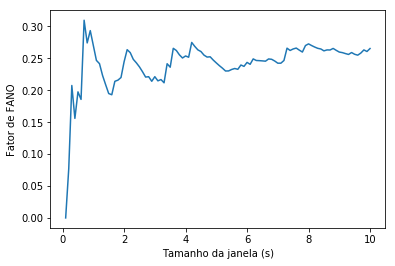

In [6]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from neurodynex. tools import input_factory

v_rest= -70*b2.mV #EL
v_reset= -80*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

a = 2*b2.nsiemens
b = 0*b2.nA

tau_w = 150*b2.ms
v_max = 20*b2.mV

simulation_time = 10000
dt =  0.01*b2.ms 

t_start=0
t_end=simulation_time
sigma = 50*b2.pA
dt_cur = 0.01
sigma = sigma/(np.sqrt(dt_cur))
mi=0
unit_time=b2.ms

tmp_size = 1 + t_end  # +1 for t=0

tmp = np.zeros((tmp_size/dt_cur, 1)) * b2.pA
size=3000
x = np.linspace(-size, size, size/dt_cur) * b2.pA
normal = np.asarray((1/np.sqrt(2*math.pi*sigma**2))*math.e**(-((x-mi)**2)/(2*sigma**2)))

normal = normal*b2.pA
for k in range(int(tmp_size/dt_cur)):
    tmp[k, 0] = random.choice(normal)

input_current = b2.TimedArray(tmp, dt=dt)

eqs = """
dv/dt = (conductance_L/membrane_capacitance)*
        (v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a*(v-v_rest)-w)/tau_w :  amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b",
                        threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation

aux=[]
win = []
fano = []
for k in range(100):
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(100*b2.ms)
    win.append(100000*b2.ms*(k+1)*b2.ms)
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    var = np.var(aux)
    fano.append(var/mean)
plt.figure()
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (s)')
plt.ylabel('Fator de FANO')
plt.show()

WARNING    C:\Users\adm\Miniconda2\envs\bmnn\lib\site-packages\ipykernel_launcher.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
 [py.warnings]


[ 0.   0.5  0.7  0.8  0.9  1.   1.1  1.4  1.5  1.6  1.8  1.9  2.   2.1  2.2
  2.3  2.4  2.5  2.6  2.7  2.8  3.   3.1  3.2  3.3  3.4  3.6  3.7  3.9  4.1
  4.2  4.4  4.7  5.1  5.4  5.5  5.6  5.7  6.   6.1  6.2  6.4  6.5  6.6  6.7
  6.8  6.9  7.1  7.3  7.4  7.6  7.8  7.9  8.   8.3  8.4  8.5  8.6  8.7  8.8
  8.9  9.1  9.2  9.3  9.5  9.6  9.7  9.9] ms
[68]
68.0
0.0
FANO: 0.0
[ 10.   10.1  10.4  10.5  10.7  10.8  10.9  11.   11.2  11.3  11.4  11.6
  11.7  11.8  12.   12.1  12.2  12.4  12.6  13.   13.1  13.2  13.4  13.5
  13.6  14.   14.1  14.2  14.4  14.5  14.7  14.8  15.1  15.2  15.3  15.4
  15.6  15.7  15.8  16.   16.2  16.4  16.5  16.6  16.7  16.8  16.9  17.
  17.1  17.2  17.3  17.4  17.6  17.7  18.   18.3  18.4  18.5  18.6  18.7
  18.9  19.   19.1  19.2  19.4  19.5  19.6  20.2  20.3  20.5  21.   21.1
  21.3  21.4  21.6  21.7  21.8  22.   22.2  22.3  22.5  22.6  22.8  22.9
  23.   23.1  23.3  23.4  23.7  23.8  23.9  24.   24.1  24.2  24.4  24.5
  24.7  24.8  24.9  25.   25.2  25.4  25.8  

[ 210.   210.3  210.4  210.5  210.6  210.7  210.8  210.9  211.1  211.2
  211.4  211.5  211.6  211.8  212.   212.1  212.2  212.5  212.6  212.7
  212.8  212.9  213.   213.2  213.3  213.4  213.5  213.6  213.8  213.9
  214.1  214.2  214.3  214.4  214.7  214.8  214.9  215.   215.1  215.2
  215.3  215.4  215.5  215.6  215.7  215.9  216.   216.2  216.4  216.5
  216.8  216.9  217.   217.1  217.3  217.4  217.5  217.6  217.7  217.8
  217.9  218.   218.1  218.2  218.3  218.4  218.5  218.6  218.7  218.8
  218.9  219.2  219.3  219.5  219.8  220.   220.1  220.2  220.5  220.6
  220.7  220.8  220.9  221.1  221.2  221.3  221.4  221.6  221.7  221.9
  222.   222.2  222.3  222.4  222.5  223.   223.1  223.2  223.3  223.5
  223.6  224.   224.1  224.3  224.5  224.6  224.7  224.8  224.9  225.
  225.2  225.3  225.4  225.6  226.   226.1  226.2  226.3  226.4  226.6
  226.7  226.8  227.   227.1  227.2  227.3  227.4  227.6  227.7  227.8
  227.9  228.   228.1  228.2  228.3  228.4  228.6  228.7  228.8  229.
  229.1 

[ 0.36    0.3602  0.3604  0.3605  0.3606  0.3607  0.3608  0.361   0.3611
  0.3612  0.3613  0.3614  0.3615  0.3616  0.3617  0.3621  0.3624  0.3625
  0.3626  0.3627  0.3628  0.363   0.3631  0.3633  0.3635  0.3636  0.3637
  0.3638  0.3639  0.3641  0.3642  0.3644  0.3645  0.3646  0.3647  0.3649
  0.365   0.3652  0.3657  0.3658  0.3659  0.366   0.3661  0.3663  0.3664
  0.3665  0.3667  0.3669  0.367   0.3672  0.3674  0.3676  0.3677  0.3678
  0.368   0.3681  0.3682  0.3683  0.3686  0.3688  0.3689  0.3691  0.3692
  0.3693  0.3694  0.3699  0.37    0.3702  0.3704  0.3705  0.3706  0.3708
  0.3709  0.371   0.3711  0.3712  0.3713  0.3715  0.3716  0.3718  0.3721
  0.3722  0.3723  0.3725  0.3726  0.3727  0.3729  0.3731  0.3732  0.3734
  0.3737  0.3741  0.3742  0.3744  0.3746  0.3747  0.375   0.3751  0.3752
  0.3753  0.3754  0.3755  0.3756  0.3757  0.3758  0.3759  0.376   0.3761
  0.3762  0.3763  0.3764  0.3766  0.3767  0.3768  0.3771  0.3772  0.3773
  0.3775  0.3776  0.3777  0.3778  0.3779  0.378   0

[ 0.55    0.5502  0.5503  0.5504  0.5507  0.5508  0.5509  0.5511  0.5513
  0.5514  0.5515  0.5516  0.5517  0.5518  0.552   0.5521  0.5523  0.5524
  0.553   0.5531  0.5533  0.5534  0.5535  0.5536  0.5537  0.5538  0.5539
  0.554   0.5542  0.5543  0.5544  0.5545  0.5546  0.5547  0.5548  0.5549
  0.5551  0.5552  0.5554  0.5555  0.5556  0.5558  0.5559  0.556   0.5561
  0.5562  0.5563  0.5564  0.5565  0.5566  0.5568  0.5569  0.557   0.5571
  0.5574  0.5575  0.5576  0.5577  0.5578  0.5581  0.5582  0.5583  0.5585
  0.5586  0.5588  0.5589  0.559   0.5593  0.5594  0.5596  0.5597  0.5599
  0.5601  0.5602  0.5603  0.5604  0.5605  0.5608  0.5609  0.561   0.5614
  0.5617  0.5618  0.5619  0.5621  0.5623  0.5624  0.5625  0.5626  0.5628
  0.563   0.5632  0.5633  0.5634  0.5635  0.5636  0.5638  0.5639  0.564
  0.5642  0.5643  0.5644  0.5646  0.5647  0.5648  0.5649  0.565   0.5651
  0.5652  0.5654  0.5655  0.5656  0.5657  0.5658  0.566   0.5661  0.5663
  0.5664  0.5665  0.5666  0.5667  0.5668  0.5669  0.

[ 0.78    0.7801  0.7802  0.7803  0.7804  0.7805  0.7806  0.7809  0.7812
  0.7813  0.7815  0.7816  0.7818  0.7819  0.782   0.7821  0.7822  0.7823
  0.7824  0.7825  0.7827  0.7828  0.7829  0.783   0.7831  0.7832  0.7833
  0.7834  0.7836  0.7839  0.784   0.7842  0.7843  0.7844  0.7845  0.7846
  0.7847  0.7848  0.7851  0.7852  0.7854  0.7856  0.7858  0.7859  0.786
  0.7862  0.7863  0.7864  0.7866  0.7867  0.7868  0.7869  0.787   0.7871
  0.7872  0.7873  0.7874  0.7876  0.7877  0.7878  0.7879  0.7881  0.7882
  0.7885  0.7887  0.789   0.7891  0.7892  0.7893  0.7894  0.7895  0.7896
  0.7899  0.79    0.7901  0.7902  0.7903  0.7904  0.7905  0.7908  0.791
  0.7911  0.7912  0.7913  0.7914  0.7915  0.7917  0.7918  0.7919  0.792
  0.7921  0.7922  0.7924  0.7925  0.7926  0.7927  0.7929  0.7931  0.7932
  0.7933  0.7934  0.7935  0.7936  0.7937  0.7938  0.794   0.7941  0.7942
  0.7943  0.7948  0.7949  0.795   0.7951  0.7955  0.7957  0.7958  0.7959
  0.796   0.7964  0.7965  0.7968  0.797   0.7973  0.79

[ 1.0501  1.0504  1.0505 ...,  1.1996  1.1997  1.1999] s
[1079]
571.8
96334.0266667
FANO: 168.475037892
[ 1.2001  1.2002  1.2003 ...,  1.3597  1.3598  1.3599] s
[1163]
608.75
110792.6875
FANO: 182.000308008
[ 1.36    1.3601  1.3602 ...,  1.5297  1.5298  1.5299] s
[1234]
645.529411765
125919.072664
FANO: 195.063261827
[ 1.53    1.5303  1.5306 ...,  1.7097  1.7098  1.7099] s
[1278]
680.666666667
139912.222222
FANO: 205.551746654
[ 1.71    1.7101  1.7102 ...,  1.8995  1.8997  1.8998] s
[1350]
715.894736842
154886.725762
FANO: 216.354050101
[ 1.9     1.9003  1.9005 ...,  2.0997  2.0998  2.0999] s
[1412]
750.7
170159.11
FANO: 226.667257227
[ 2.1001  2.1002  2.1003 ...,  2.3095  2.3096  2.3099] s
[1517]
787.19047619
188687.39229
FANO: 239.6972499
[ 2.3103  2.3104  2.3106 ...,  2.5297  2.5298  2.5299] s
[1618]
824.954545455
210059.316116
FANO: 254.631382145
[ 2.53    2.5301  2.5303 ...,  2.7595  2.7596  2.7599] s
[1672]
861.782608696
230765.039698
FANO: 267.776394382
[ 2.76    2.7601  2.7602 

[ 37.41    37.4101  37.4102 ...,  38.2797  38.2798  38.2799] s
[8700]
4075.09195402
7394425.66971
FANO: 1814.54204056
[ 38.28    38.2801  38.2802 ...,  39.1597  39.1598  39.1599] s
[8800]
4128.78409091
7561205.66929
FANO: 1831.339567
[ 39.16    39.1601  39.1602 ...,  40.0497  40.0498  40.0499] s
[8900]
4182.39325843
7729155.27231
FANO: 1848.02212387
[ 40.05    40.0501  40.0502 ...,  40.9497  40.9498  40.9499] s
[9000]
4235.92222222
7898291.91617
FANO: 1864.59795573
[ 40.95    40.9501  40.9502 ...,  41.8597  41.8598  41.8599] s
[9100]
4289.37362637
8068632.23403
FANO: 1881.0747062
[ 41.86    41.8601  41.8602 ...,  42.7797  42.7798  42.7799] s
[9200]
4342.75
8240192.10054
FANO: 1897.45946705
[ 42.78    42.7801  42.7802 ...,  43.7097  43.7098  43.7099] s
[9300]
4396.05376344
8412986.67453
FANO: 1913.75882263
[ 43.71    43.7101  43.7102 ...,  44.6497  44.6498  44.6499] s
[9400]
4449.28723404
8587030.43877
FANO: 1929.97889034
[ 44.65    44.6501  44.6502 ...,  45.5997  45.5998  45.5999] s
[9

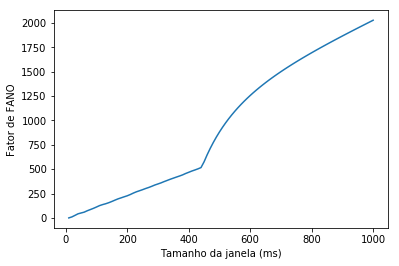

In [5]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from neurodynex. tools import input_factory

v_rest= -70*b2.mV #EL
v_reset= -80*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #Vth
deltaVth = 2*b2.mV

a = 2*b2.nsiemens
b = 0*b2.nA

tau_w = 150*b2.ms
v_max = 20*b2.mV

simulation_time = 10000
dt =  0.01*b2.ms 

t_start=0
t_end=simulation_time
sigma = 50*b2.pA
dt_cur = 0.01
sigma = sigma/(np.sqrt(dt_cur))
mi=0
unit_time=b2.ms

tmp_size = 1 + t_end  # +1 for t=0

tmp = np.zeros((tmp_size/dt_cur, 1)) * b2.pA
size=3000
x = np.linspace(-size, size, size/dt_cur) * b2.pA
normal = np.asarray((1/np.sqrt(2*math.pi*sigma**2))*math.e**(-((x-mi)**2)/(2*sigma**2)))

normal = normal*b2.pA
for k in range(int(tmp_size/dt_cur)):
    tmp[k, 0] = random.choice(normal)

input_current = b2.TimedArray(tmp, dt=dt)

eqs = """
dv/dt = (conductance_L/membrane_capacitance)*
        (v_rest - v + deltaVth*exp((v-firing_threshold)/deltaVth))
        - (w/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance) : volt
dw/dt = (a*(v-v_rest)-w)/tau_w :  amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; w=w+b",
                        threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.w = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "w"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)

# run the simulation

auxi=[]
win=[]
fano=[]
for z in range(100):
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(10*(z+1)*b2.ms)
    win.append(10*(z+1))
    print(spike_monitor.t[:])
    print(spike_monitor.count[:])
    auxi.append(spike_monitor.count[:])
    mean = np.mean(auxi)
    print(mean)
    var = np.var(auxi)
    print(var)
    print("FANO: {}".format(var/mean))
    fano.append(var/mean)

plt.figure()
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (ms)')
plt.ylabel('Fator de FANO')
plt.show()